## Computer Jazz

Using a Recurrent Neural Network to generate music.

Limitations:

- Running it on my own computer (M1 mac mini -> no cuda, but access to GPU using mps)
    But I did use google colab to optimize and test. 
- insufficient/ inconsistent training data (different instruments/ sometimes a
drums track is included, only ±450 midi images with limited length)

---

I got inspired by recent AI versions of Frank Sinatra singing popular songs (pretty confincing). And it sent me down a Youtube loophole looking for methods of generating
AI music. 

Anyhow, there was this video of a guy trying three different approaches
to generate computer composed jazz music. 
https://www.youtube.com/watch?v=nA3YOFUCn4U


The way he does it is by converting MIDI files to images, and using various
neural networks to reconstruct these images. The best for this purpose was Pixel CNN (though it is a matter of taste, I guess a lot will pass for music).
Pixel CNN in contrast with a general Convolutional neural network generates pixel by pixel based on the previous pixels (by masking the rest) instead of generating a whole picture at once. And this may be exactly what you want in the creation of music:
based on the tones that have been played in sequence in the test data, what would be the best prediction for the next note to play, or maybe a pause, or a pitch shift?

Link to the paper on Pixel CNN:
https://arxiv.org/pdf/1701.05517.pdf

Pytorch implementation of Pixel CNN that I am using (I tried to build it from scratch first but could not get it to work right. So I grabbed and modified this one.):
https://github.com/singh-hrituraj/PixelCNN-Pytorch


I found these MIDI's on kaggle: https://www.kaggle.com/datasets/saikayala/jazz-ml-ready-midi

And found out that these aren't exactly jazz numbers. :(
So the goal is more the creation of music instead of Jazz.

The code used to convert the MIDI's to images and back I found at (and slightly modified it): https://github.com/mathigatti/midi2img/

In the MIDI to image code different instruments or when the length of pixels is exceeded different images are saved in separate files.
In the mentioned Youtube video a three channel image is used (rgb) to store more data in one image of one instrument getting three times as much information in one image. However I think it would be more interesting to use the different channels for different instruments. 


First I generated all rgb images.
Example, 634-5789.midi becomes:

<img src="634-5789.png" alt=" midi" style="width: 30%; height: 30%;">



Because of the way the pixels are constructed (top to bottom) it is best to rotate the images 90 degrees
In that way the model takes in account pixels generated in the same space.







In [1]:
import os
from PIL import Image

import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from PixelCNN.model import PixelCNN

In [2]:
#hyperparams
batch_size = 12
num_epochs = 250
learning_rate = 0.01
num_layers = 256
num_filters = 64




In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

device

device(type='mps')

In [4]:
train_path = "/Users/timniemeijer/DATA/Jazz_midi_images/"

dir_name = "train_dataset_dir"

pictures = os.listdir(os.path.join(train_path,dir_name))


example_paths = [os.path.join(train_path, dir_name, picture) for picture in pictures if picture != '.DS_Store']

images = [Image.open(example_path) for example_path in example_paths]

np_ims = [np.rot90(np.array(image.getdata()).reshape((106,100,3))).astype('float32') for image in images]



In [5]:
# Model test

# Set random seed for reproducibility
torch.manual_seed(42)

# Create the PixelCNN model
model = PixelCNN(no_layers=num_layers, channels=num_filters).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#input data
input_data = torch.tensor(np_ims)
input_data = input_data.permute(0, 3, 1, 2).to(device)
print(input_data.shape)

# Create a data loader
dataloader = DataLoader(input_data, batch_size=batch_size, shuffle=True)


torch.Size([472, 3, 100, 106])


/var/folders/rj/lbtpvbdj0yxdj_ttcp98v_3w0000gn/T/ipykernel_6686/1457875979.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  input_data = torch.tensor(np_ims)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


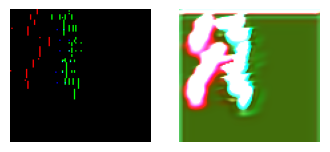

Epoch [1/250], Loss: 600.470398
Epoch [2/250], Loss: 381.336578
Epoch [3/250], Loss: 267.798492
Epoch [4/250], Loss: 385.602295
Epoch [5/250], Loss: 355.641052
Epoch [6/250], Loss: 308.895203
Epoch [7/250], Loss: 307.115692
Epoch [8/250], Loss: 292.209686
Epoch [9/250], Loss: 205.721436
Epoch [10/250], Loss: 205.099960


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


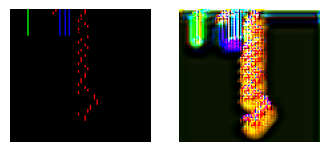

Epoch [11/250], Loss: 203.155304
Epoch [12/250], Loss: 257.480957
Epoch [13/250], Loss: 171.319901
Epoch [14/250], Loss: 186.794861
Epoch [15/250], Loss: 187.898010
Epoch [16/250], Loss: 202.690002
Epoch [17/250], Loss: 212.555359
Epoch [18/250], Loss: 241.094040
Epoch [19/250], Loss: 309.982300
Epoch [20/250], Loss: 199.379150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


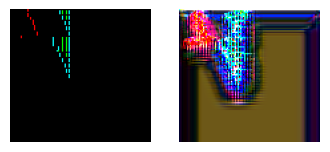

Epoch [21/250], Loss: 192.185394
Epoch [22/250], Loss: 172.968109
Epoch [23/250], Loss: 213.010803
Epoch [24/250], Loss: 218.505920
Epoch [25/250], Loss: 180.617798
Epoch [26/250], Loss: 137.685410
Epoch [27/250], Loss: 197.249939
Epoch [28/250], Loss: 177.287506
Epoch [29/250], Loss: 213.669617
Epoch [30/250], Loss: 140.615463


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


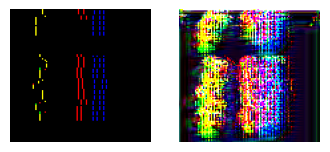

Epoch [31/250], Loss: 135.497238
Epoch [32/250], Loss: 150.217545
Epoch [33/250], Loss: 184.382370
Epoch [34/250], Loss: 145.929459
Epoch [35/250], Loss: 145.889938
Epoch [36/250], Loss: 215.501343
Epoch [37/250], Loss: 195.116089
Epoch [38/250], Loss: 143.852036
Epoch [39/250], Loss: 213.271118
Epoch [40/250], Loss: 216.862198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


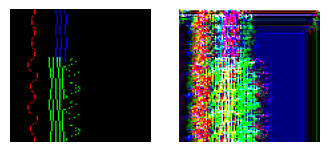

Epoch [41/250], Loss: 168.350189
Epoch [42/250], Loss: 155.463959
Epoch [43/250], Loss: 170.895493
Epoch [44/250], Loss: 161.776718
Epoch [45/250], Loss: 216.882568
Epoch [46/250], Loss: 168.715332
Epoch [47/250], Loss: 120.351540
Epoch [48/250], Loss: 191.621033
Epoch [49/250], Loss: 245.983276
Epoch [50/250], Loss: 180.289032


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


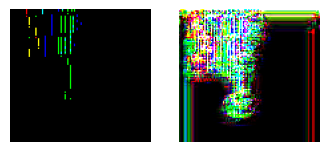

Epoch [51/250], Loss: 110.486435
Epoch [52/250], Loss: 157.868088
Epoch [53/250], Loss: 67.137962
Epoch [54/250], Loss: 116.725342
Epoch [55/250], Loss: 97.493469
Epoch [56/250], Loss: 107.453461
Epoch [57/250], Loss: 197.860199
Epoch [58/250], Loss: 129.811905
Epoch [59/250], Loss: 154.667755
Epoch [60/250], Loss: 115.977180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


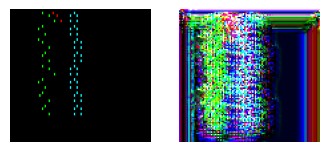

Epoch [61/250], Loss: 117.229950
Epoch [62/250], Loss: 175.645081
Epoch [63/250], Loss: 122.311249
Epoch [64/250], Loss: 125.076515
Epoch [65/250], Loss: 97.213867
Epoch [66/250], Loss: 154.074677
Epoch [67/250], Loss: 81.435623
Epoch [68/250], Loss: 148.000671
Epoch [69/250], Loss: 107.037369
Epoch [70/250], Loss: 70.685989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


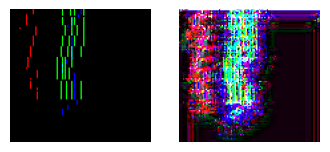

Epoch [71/250], Loss: 102.150146
Epoch [72/250], Loss: 110.858597
Epoch [73/250], Loss: 97.194962
Epoch [74/250], Loss: 147.699966
Epoch [75/250], Loss: 115.493782
Epoch [76/250], Loss: 100.736862
Epoch [77/250], Loss: 88.340889
Epoch [78/250], Loss: 83.453995
Epoch [79/250], Loss: 121.996910
Epoch [80/250], Loss: 87.346870


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


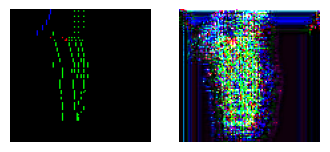

Epoch [81/250], Loss: 106.265099
Epoch [82/250], Loss: 102.830879
Epoch [83/250], Loss: 98.908737
Epoch [84/250], Loss: 108.672714
Epoch [85/250], Loss: 85.871239
Epoch [86/250], Loss: 82.121094
Epoch [87/250], Loss: 97.773666
Epoch [88/250], Loss: 107.667435
Epoch [89/250], Loss: 72.315231
Epoch [90/250], Loss: 90.560028


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


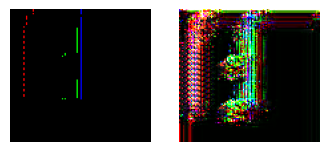

Epoch [91/250], Loss: 85.676743
Epoch [92/250], Loss: 56.002811
Epoch [93/250], Loss: 76.947357
Epoch [94/250], Loss: 71.129692
Epoch [95/250], Loss: 65.635147
Epoch [96/250], Loss: 84.065140
Epoch [97/250], Loss: 78.952446
Epoch [98/250], Loss: 94.744209
Epoch [99/250], Loss: 99.363708
Epoch [100/250], Loss: 63.457401


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


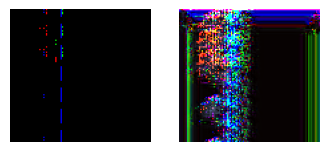

Epoch [101/250], Loss: 67.992401
Epoch [102/250], Loss: 85.134041
Epoch [103/250], Loss: 84.007690
Epoch [104/250], Loss: 80.776337
Epoch [105/250], Loss: 80.922714
Epoch [106/250], Loss: 58.241982
Epoch [107/250], Loss: 90.321053
Epoch [108/250], Loss: 75.361084
Epoch [109/250], Loss: 87.408318
Epoch [110/250], Loss: 73.497772


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


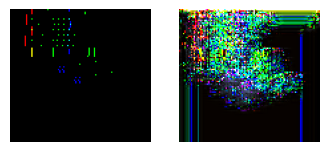

Epoch [111/250], Loss: 82.561081
Epoch [112/250], Loss: 79.086662
Epoch [113/250], Loss: 86.528503
Epoch [114/250], Loss: 73.176453
Epoch [115/250], Loss: 51.778061
Epoch [116/250], Loss: 56.932747
Epoch [117/250], Loss: 67.632935
Epoch [118/250], Loss: 67.948624
Epoch [119/250], Loss: 61.576843
Epoch [120/250], Loss: 88.992966


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


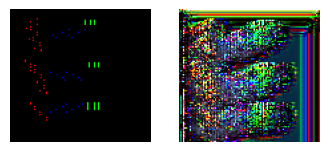

Epoch [121/250], Loss: 66.913094
Epoch [122/250], Loss: 71.916267
Epoch [123/250], Loss: 62.759007
Epoch [124/250], Loss: 93.939362
Epoch [125/250], Loss: 69.241264
Epoch [126/250], Loss: 59.811302
Epoch [127/250], Loss: 58.608364
Epoch [128/250], Loss: 98.993248
Epoch [129/250], Loss: 113.630043
Epoch [130/250], Loss: 78.641014


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


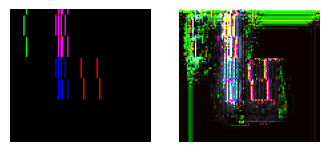

Epoch [131/250], Loss: 58.330376
Epoch [132/250], Loss: 68.949287
Epoch [133/250], Loss: 48.784546
Epoch [134/250], Loss: 56.974934
Epoch [135/250], Loss: 49.047855
Epoch [136/250], Loss: 64.822380
Epoch [137/250], Loss: 52.015999
Epoch [138/250], Loss: 61.836853
Epoch [139/250], Loss: 55.257172
Epoch [140/250], Loss: 65.594429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


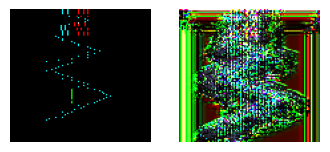

Epoch [141/250], Loss: 101.100578
Epoch [142/250], Loss: 68.987236
Epoch [143/250], Loss: 67.288231
Epoch [144/250], Loss: 79.645027
Epoch [145/250], Loss: 58.646908
Epoch [146/250], Loss: 70.663200
Epoch [147/250], Loss: 54.623486
Epoch [148/250], Loss: 50.687038
Epoch [149/250], Loss: 45.065418
Epoch [150/250], Loss: 76.474968


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


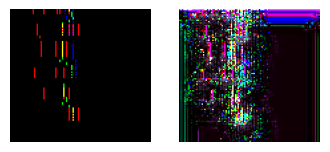

Epoch [151/250], Loss: 55.858910
Epoch [152/250], Loss: 77.429268
Epoch [153/250], Loss: 79.903557
Epoch [154/250], Loss: 64.828217
Epoch [155/250], Loss: 44.891224
Epoch [156/250], Loss: 36.768288
Epoch [157/250], Loss: 49.871929
Epoch [158/250], Loss: 60.801704
Epoch [159/250], Loss: 44.081699
Epoch [160/250], Loss: 53.831005


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


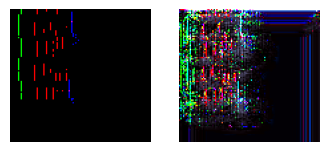

Epoch [161/250], Loss: 56.016319
Epoch [162/250], Loss: 40.815914
Epoch [163/250], Loss: 53.611855
Epoch [164/250], Loss: 73.016396
Epoch [165/250], Loss: 46.803677
Epoch [166/250], Loss: 36.768646
Epoch [167/250], Loss: 71.756454
Epoch [168/250], Loss: 46.226322
Epoch [169/250], Loss: 43.447742
Epoch [170/250], Loss: 52.483994


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


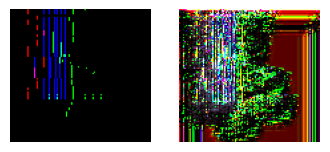

Epoch [171/250], Loss: 94.760551
Epoch [172/250], Loss: 42.696136
Epoch [173/250], Loss: 47.318249
Epoch [174/250], Loss: 44.473103
Epoch [175/250], Loss: 65.146164
Epoch [176/250], Loss: 67.413704
Epoch [177/250], Loss: 46.655445
Epoch [178/250], Loss: 47.530361
Epoch [179/250], Loss: 49.224251
Epoch [180/250], Loss: 84.614197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


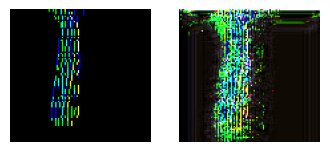

Epoch [181/250], Loss: 79.863632
Epoch [182/250], Loss: 45.779873
Epoch [183/250], Loss: 62.360279
Epoch [184/250], Loss: 39.438835
Epoch [185/250], Loss: 43.970329
Epoch [186/250], Loss: 47.944489
Epoch [187/250], Loss: 45.128693
Epoch [188/250], Loss: 46.784439
Epoch [189/250], Loss: 73.223595
Epoch [190/250], Loss: 41.783829


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


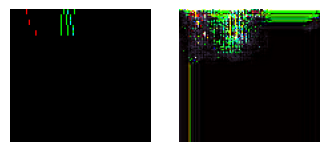

Epoch [191/250], Loss: 46.569698
Epoch [192/250], Loss: 53.010963
Epoch [193/250], Loss: 54.576653
Epoch [194/250], Loss: 42.793907
Epoch [195/250], Loss: 41.384769
Epoch [196/250], Loss: 36.890488
Epoch [197/250], Loss: 43.140335
Epoch [198/250], Loss: 45.069004
Epoch [199/250], Loss: 49.570320
Epoch [200/250], Loss: 42.841187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


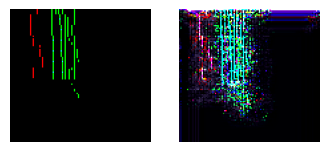

Epoch [201/250], Loss: 50.758961
Epoch [202/250], Loss: 50.879482
Epoch [203/250], Loss: 62.821171
Epoch [204/250], Loss: 35.727577
Epoch [205/250], Loss: 51.806656
Epoch [206/250], Loss: 76.696892
Epoch [207/250], Loss: 37.771946
Epoch [208/250], Loss: 34.971397
Epoch [209/250], Loss: 59.610928
Epoch [210/250], Loss: 62.315643


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


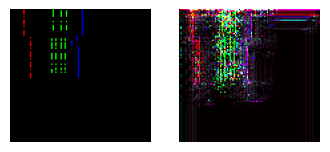

Epoch [211/250], Loss: 41.015530
Epoch [212/250], Loss: 53.782497
Epoch [213/250], Loss: 59.492886
Epoch [214/250], Loss: 46.134693
Epoch [215/250], Loss: 52.471272
Epoch [216/250], Loss: 28.460859
Epoch [217/250], Loss: 36.323223
Epoch [218/250], Loss: 32.555744
Epoch [219/250], Loss: 53.991547
Epoch [220/250], Loss: 41.838055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


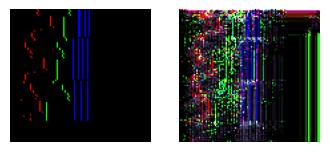

Epoch [221/250], Loss: 52.257317
Epoch [222/250], Loss: 45.734398
Epoch [223/250], Loss: 35.129723
Epoch [224/250], Loss: 59.291092
Epoch [225/250], Loss: 57.399864
Epoch [226/250], Loss: 60.104118
Epoch [227/250], Loss: 35.065094
Epoch [228/250], Loss: 38.838905
Epoch [229/250], Loss: 53.158875
Epoch [230/250], Loss: 46.997536


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


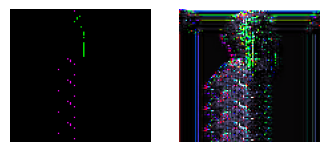

Epoch [231/250], Loss: 34.340424
Epoch [232/250], Loss: 36.391140
Epoch [233/250], Loss: 41.080360
Epoch [234/250], Loss: 36.634918
Epoch [235/250], Loss: 34.780830
Epoch [236/250], Loss: 46.530842
Epoch [237/250], Loss: 36.530418
Epoch [238/250], Loss: 38.786697
Epoch [239/250], Loss: 63.779114
Epoch [240/250], Loss: 66.165497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


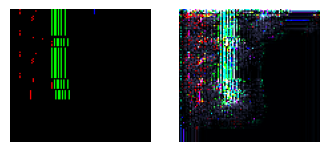

Epoch [241/250], Loss: 50.040531
Epoch [242/250], Loss: 46.522655
Epoch [243/250], Loss: 44.800148
Epoch [244/250], Loss: 43.165581
Epoch [245/250], Loss: 41.074512
Epoch [246/250], Loss: 58.782246
Epoch [247/250], Loss: 55.003929
Epoch [248/250], Loss: 35.210632
Epoch [249/250], Loss: 29.720892
Epoch [250/250], Loss: 28.021593


In [6]:
# Train the model
model.train()
for epoch in range(num_epochs):
    for images in dataloader:
        # Forward pass
        outputs = model(images)
        # Compute the loss (reconstruction loss)
        loss = criterion(outputs, images)
        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 1:
        fig, ax = plt.subplots(1,2, figsize=(4,8))
        ax[0].imshow(images[0].detach().permute(1,2,0).cpu().numpy())
        ax[1].imshow(outputs[0].detach().permute(1,2,0).cpu().numpy())
        ax[0].axis('off')
        ax[1].axis('off')
        plt.show()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

In [7]:
# Set the model to evaluation mode
model.eval()

# Specify the image size and number of channels
image_size = (100, 106)
num_channels = 3

# Generate a random seed image
seed_image = torch.zeros(1, num_channels, *image_size).to(device)

# Generate a single pixel of full intensity at a random position in the first row
with torch.no_grad():
    # First row has a random pixel
    random_col = torch.randint(0, image_size[1], (1,))
    # start with one random red pixel
    mask = torch.zeros(1, 1, *image_size).to(device)
    mask[:, 0, 0, random_col] = 255.0
    seed_image = seed_image + mask

    # Generate the remaining pixels sequentially
    for i in range(1, image_size[0]):
        for j in range(image_size[1]):
            # Condition the model on the previously generated pixels
            output = model(seed_image)
            signal = output[:, :, i, j].float()
            # threshold of about 10%. tried using chances first but I guess
            # the model had to be trained with pixels in the range 0-1
            signal = torch.where(signal > 25.0, torch.tensor(255.0, device=device), torch.tensor(0.0, device=device))
            seed_image[:, :, i, j] = signal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(100, 106, 3)


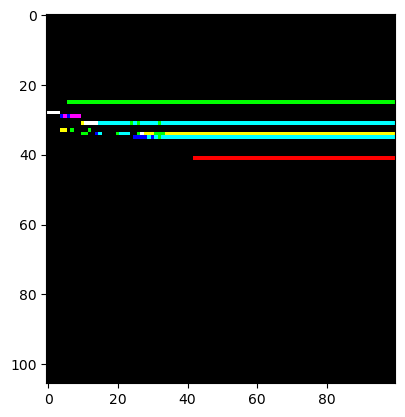

In [8]:
# Convert the seed image tensor to a numpy array
generated_image = seed_image.squeeze().permute(1,2,0).cpu().numpy()

# Display the generated image
print(generated_image.shape)

plt.imshow(np.rot90(generated_image, 1))
#plt.axis('off')
plt.show()

In [9]:
from imageio import imwrite

#rotate back 
rot_img = np.rot90(generated_image)

imwrite('im_test_1708.png',rot_img.astype(np.uint8))